In [1]:
# Importing below Python libraries for data analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Importing the warnings module for handling warning messages
import warnings

# Ignoring warning messages to prevent interruptions during code execution
warnings.filterwarnings("ignore")

df = pd.read_csv(r"C:\Users\Meghana\Desktop\mini project dataset\udemy dataset\ufinal.csv")
df.head()

,id,title,url,is_paid,instructor_names,category,headline,num_subscribers,rating,num_reviews,instructional_level,objectives,curriculum
0,567828,The Complete Python Bootcamp From Zero to Hero...,https://www.udemy.com/course/complete-python-b...,True,"Jose Portilla, Pierian Training",Development,Learn Python like a Professional Start from t...,1976866,4.576494,521219,All Levels,You will learn how to leverage the power of Py...,"Course Overview, Auto-Welcome Message, Course ..."
1,1565838,The Complete 2024 Web Development Bootcamp,https://www.udemy.com/course/the-complete-web-...,True,"Dr. Angela Yu, Developer and Lead Instructor",Development,Become a Full-Stack Web Developer with just ON...,1362586,4.679065,409793,All Levels,Build 16 web development projects for your por...,"Front-End Web Development, What You'll Get in ..."
2,2776760,100 Days of Code: The Complete Python Pro Boot...,https://www.udemy.com/course/100-days-of-code/,True,"Dr. Angela Yu, Developer and Lead Instructor",Development,Master Python by building 100 projects in 100 ...,1417942,4.698768,331803,All Levels,You will master the Python programming languag...,Day 1 - Beginner - Working with Variables in P...
3,625204,The Web Developer Bootcamp 2024,https://www.udemy.com/course/the-web-developer...,True,Colt Steele,Development,10 Hours of React just added. Become a Develop...,923815,4.673450,276723,All Levels,"The ins and outs of HTML5, CSS3, and Modern Ja...","Course Orientation, Welcome To The Course!, Jo..."
4,1362070,React - The Complete Guide 2024 (incl. Next.js...,https://www.udemy.com/course/react-the-complet...,True,"Academind by Maximilian Schwarzmüller, Maximil...",Development,Dive in and learn React.js from scratch! Learn...,909848,4.638643,220051,All Levels,Learn React from the ground up and finish the ...,"Getting Started, Welcome To The Course!, What ..."


In [2]:
# Calculate the number of null values in each column
null_counts = df.isnull().sum()

# Print the results
print(null_counts)

id                     0
title                  0
url                    0
is_paid                0
instructor_names       2
category               0
headline               0
num_subscribers        0
rating                 0
num_reviews            0
instructional_level    0
objectives             0
curriculum             0
dtype: int64


In [3]:
df.shape[0]

98104

In [4]:
# Remove rows with null values
df.dropna(inplace=True)

# Reset the index of the DataFrame
df.reset_index(inplace=True, drop=True)

In [5]:
# Calculate the number of null values in each column
null_counts = df.isnull().sum()

# Print the results
print(null_counts)

id                     0
title                  0
url                    0
is_paid                0
instructor_names       0
category               0
headline               0
num_subscribers        0
rating                 0
num_reviews            0
instructional_level    0
objectives             0
curriculum             0
dtype: int64


In [6]:
df.dtypes


id                       int64
title                   object
url                     object
is_paid                   bool
instructor_names        object
category                object
headline                object
num_subscribers          int64
rating                 float64
num_reviews              int64
instructional_level     object
objectives              object
curriculum              object
dtype: object

In [7]:
df['is_paid'] = df['is_paid'].astype(bool)


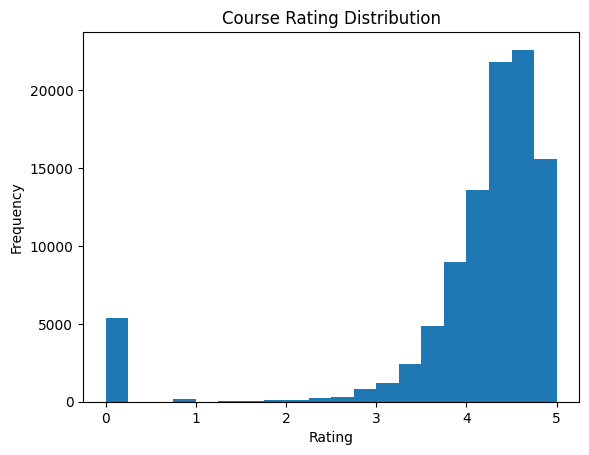

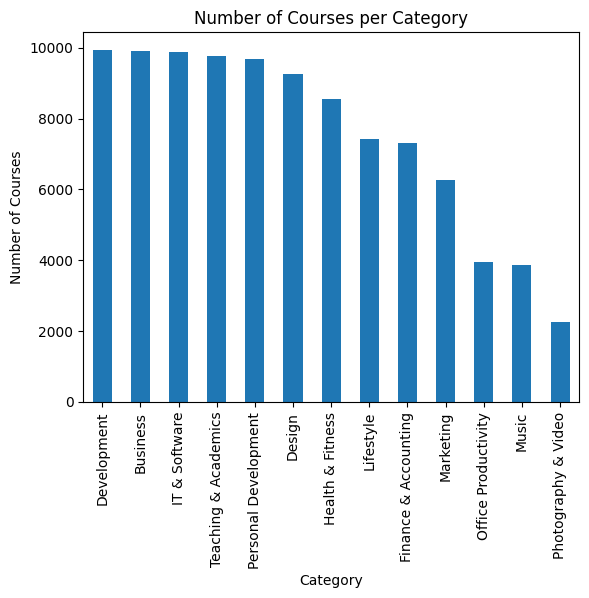

In [8]:
import matplotlib.pyplot as plt

# Plot distribution of ratings
df['rating'].plot(kind='hist', bins=20, title='Course Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

# Plot number of courses per category
df['category'].value_counts().plot(kind='bar', title='Number of Courses per Category')
plt.xlabel('Category')
plt.ylabel('Number of Courses')
plt.show()


In [10]:
import pandas as pd
import re

# List of predefined skills
skills_list = [
    'HTML', 'CSS', 'JavaScript', 'Node.js', 'React', 'MongoDB', 'Git', 'Express', 'SQL', 'Python', 'Django',
    'Angular', 'Vue', 'TypeScript', 'Docker', 'AWS', 'API', 'REST', 'GraphQL', 'jQuery', 'Bootstrap', 'Webpack',
    'HTML5', 'Node', 'Machine Learning', 'Data Science', 'Deep Learning', 'SQL', 'Cloud Computing', 'Swift',
    'Kotlin', 'C#', 'Ruby', 'GitHub', 'Ruby on Rails', 'PHP', 'Firebase', 'Vagrant', 'Linux',
    'Jira', 'AI', 'Agile', 'Unity', 'VS Code', '.NET', 'C# and .NET Framework', 'C# vs .NET', 'What is CLR?', 'Architecture of .NET',
     'CI', 'CD', 'DevOps', 'Go', 'Classes', 'Constructors', 'Fields', 'Properties', 'Methods', 'Relational Databases', 
    'Clean Code', 'JMeter', 'Single Responsibility Principle', 'Cohesion', 'Coupling', 'Reasons for Change', 'Open Closed Principle', 
    'Real World Analogies', 'Liskov Substitution Principle', 'Breaking The Hierarchy', 'Interface Segregation Principle',
    'Dependency Inversion Principle', 'Dependency Injection', 'ISTQB FL', 'Fundamentals of Testing', 'Testing Throughout the Software Development Lifecycle',
    'Static Testing', 'Test Analysis & Design', 'Test Management', 'Test Tools', 'Course Content Overview', 'Exam Structure', 
    'Business Outcomes', 'Introduction Quiz', 'Course Slides', 'Fundamentals of Testing', 'Testing Throughout the Software Development Lifecycle', 
    'Static Testing', 'Chapter 4: Test Analysis & Design', 'Test Management', 'Test Tools',
    'UNIX', 'data', 'power-bi', 'R programming', 'Data structures and algorithms', 'opencv', 'solid', 'vim', 'natural language processing', 'SASS & SCSS', 'ISTQB Foundation Level Exam',
    'rust', 'ue4', 'uml', 'resume','RC','Circuit','Resonance','C','C plus plus','C programming','C++ programming','go'
]

# List of common stopwords (you can expand this as needed)
stopwords = set([
    'the', 'a', 'with', 'and', 'for', 'to', 'of', 'in', 'on', 'is', 'this', 'that', 'at', 'by', 'from', 'be', 'an',
    'as', 'it', 'which', 'we', 'become', 'i', 'learn', 'build', 'use', 'using', 'how', 'my', 'welcome', 'course',
    'install', 'issue','college','into','make','present'
])

# Function to extract skills from the description and title
def extract_skills(description, title, skills_list):
    # Convert description and title to lowercase and split into words
    words = re.findall(r'\b\w+\b', (description + " " + title).lower())  # Combine description and title

    # Remove stopwords from words
    words = [word for word in words if word not in stopwords]

    # Find skills from the predefined list
    found_skills = set(skill for skill in skills_list if skill.lower() in words)

    # If no skills are found from the predefined list, attempt to find skill-like words
    if not found_skills:
        # Consider words longer than 2 characters and likely to be skills
        possible_skills = set([word for word in words if len(word) > 2])

        # Check if any new skills are identified that are not in the predefined list
        found_skills.update([word for word in possible_skills if word not in skills_list])

    return list(found_skills)

# Function to process the course data and handle missing skills
def process_courses(df, skills_list):
    # Apply the skill extraction function to each course description and title
    df['Skills'] = df.apply(lambda row: extract_skills(row['curriculum'], row['title'], skills_list), axis=1)

    # Return the updated dataframe with course titles and extracted skills
    return df

# Example usage
df = pd.read_csv(r"C:\Users\Meghana\Desktop\mini project dataset\udemy dataset\ufinal.csv")

# Process the courses and extract skills
df = process_courses(df, skills_list)

# Show the results
print(df[['title', 'Skills']])

# Process the courses and extract skills again (to ensure it's applied)
df = process_courses(df, skills_list)

# Save the updated DataFrame with the extracted skills into a new CSV file, including the 'url' column
df[['url', 'title', 'Skills']].to_csv(r'C:\Users\Meghana\Desktop\MCA Final Demo\Courses\courses_with_skills.csv', index=False)

# Filter rows where no skills were found
no_skills_df = df[df['Skills'].apply(lambda x: len(x) == 0)]

# Print the number of empty lists in the Skills column
empty_skills_count = df['Skills'].apply(lambda x: len(x) == 0).sum()
print(f'Number of empty lists in Skills column: {empty_skills_count}')

# Print the rows with empty skills
print(no_skills_df[['url', 'title', 'curriculum', 'Skills']])


                                                   title  \
0      The Complete Python Bootcamp From Zero to Hero...   
1             The Complete 2024 Web Development Bootcamp   
2      100 Days of Code: The Complete Python Pro Boot...   
3                        The Web Developer Bootcamp 2024   
4      React - The Complete Guide 2024 (incl. Next.js...   
...                                                  ...   
98099  LinkedIn Career Success Starter for High Schoo...   
98100  2 Minute French Whisperer Advanced - Course 4 ...   
98101                   Introduction to Biology of Aging   
98102  Mastering Schematics Electrical Drawings Episo...   
98103  Understanding RC  Resonant Circuits and Passiv...   

                                                  Skills  
0      [Properties, Methods, Classes, Python, Git, Gi...  
1      [React, API, CSS, Properties, jQuery, Methods,...  
2      [Properties, API, CSS, Methods, solid, Classes...  
3      [React, API, CSS, HTML5, MongoDB, jQ